# Predict Students Dropout and Academic Success

This notebook conducts a thorough investigation into the patterns of student dropouts in schools, utilizing the "Predict Students' Dropout and Academic Success" dataset from UCI. This dataset encompasses various factors that illuminate the complexities leading to student dropouts.

## About the dataset
The dataset offers a detailed perspective on students across various undergraduate programs, covering demographic, socio-economic, and academic performance data. This information serves to identify potential dropout predictors and academic success factors. The dataset includes diverse databases with enrollment-time data, such as application mode and chosen courses. It also enables the estimation of student performance across semesters, incorporating data on curricular units and grades. Additionally, regional economic indicators like unemployment and GDP rates are included to explore their impact on dropout and academic success. This dataset is a crucial analytical tool for understanding student retention and success across various disciplines.

## Data Summary
The dataset comprises over 4,400 student records with 37 attributes, including both numerical and categorical data. Key features include 'Admission grade', 'Age', 'Nationality', and 'Success Rate' for different semesters. The 'Target' variable categorizes students into 'Dropout', 'Enrolled', and 'Graduate'.

# I. Exploratory Data Analysis (EDA)
This EDA aims to uncover insights from a student dataset focusing on various academic and personal attributes that might influence their outcomes (Dropout, Enrolled, Graduate). The dataset includes features like admission grades, enrollment status, course details, and other demographic and academic variables.

## Step 1 - Basic Data Exploration 
We will start by exploring the dataset, checking the number of entries, features, missing values, ...

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import zscore

# Import additional libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
# 1) Load the dataset
data = pd.read_csv('data.csv', delimiter=';')
print(data.head())
print(data.info())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [37]:
# Visualize and understand the dataset
print(f"Total samples: {data.shape[0]}")
print(f"Total features: {data.shape[1]}")
print("="*20)
print("Missing values per column:\n")
print(data.isnull().sum())
print("="*20)
print("\nData types and null values:\n")
print(data.info())

Total samples: 4424
Total features: 37
Missing values per column:

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                           

### Results
- Total number of samples in the dataset is 4,424.
- The dataset consists of 37 features (or columns).
- There are no missing values across all columns, indicating a complete dataset with no gaps in the data.
- The dataset includes a mix of **numerical** types: 
  - 30 integer columns, which could represent categorical or discrete numerical data.
  - 7 float columns, likely representing continuous numerical data.
- The **Target** column is present with no missing values, suggesting it is the dependent variable for predictive modeling, possibly representing student dropout or continuation. It is **categorical**
- The data seems well-structured and cleaned, making it conducive for analysis and modeling without the need for further data cleaning steps related to handling missing values.

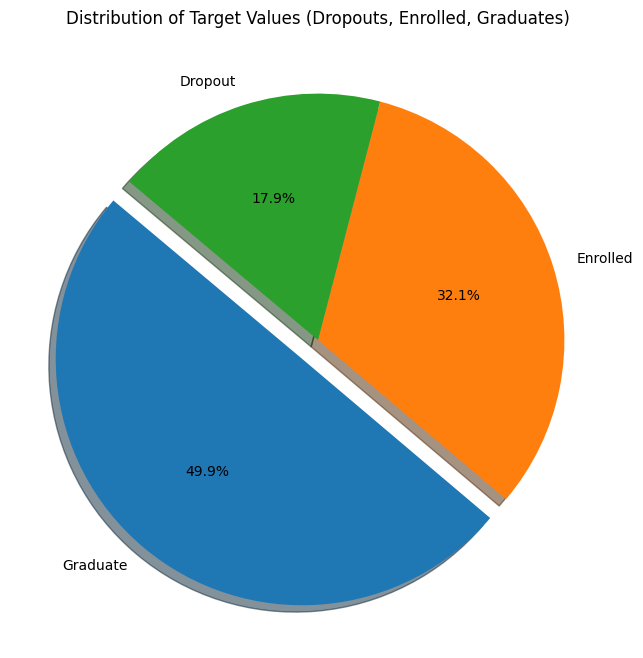

In [27]:
# Calculate the value counts for the 'Target' column
target_counts = data['Target'].value_counts()

# Create a DataFrame from the value counts
df = pd.DataFrame({
    'Target': target_counts.index,
    'Count_T': target_counts.values
})

# Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))
plt.pie(df['Count_T'], labels=['Graduate', 'Enrolled', 'Dropout'], autopct='%1.1f%%', startangle=140, explode=[0.1, 0, 0], shadow=True)
plt.title('Distribution of Target Values (Dropouts, Enrolled, Graduates)')
plt.show()


## Step 2 - Basic Data Changes
Since the dataset seems to be "complete", we will make sure to have more descriptive and correct feature names.

In [22]:
# Fix Column names
data.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

Since our target feature is categorical, we will check the number of categories (or classes) and will map them to numerical classes.

In [23]:
# Check Target Values
print(data["Target"].unique())

['Dropout' 'Graduate' 'Enrolled']


In [24]:
# Encode Target Value:
# Dropout = 0 | Enrolled = 1 | Graduate = 2
data['Target'] = data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

This basic change will be stored in a new csv file for later usage

In [25]:
data.to_csv('processed_data.csv',index=False)

## Step 3 - Data Analysis
In this section, we will start a deeper analysis on the features of this dataset. From correlation to the target, to distribution, to grouping, ranking, and many more.

/home/ralf/.local/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/home/ralf/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


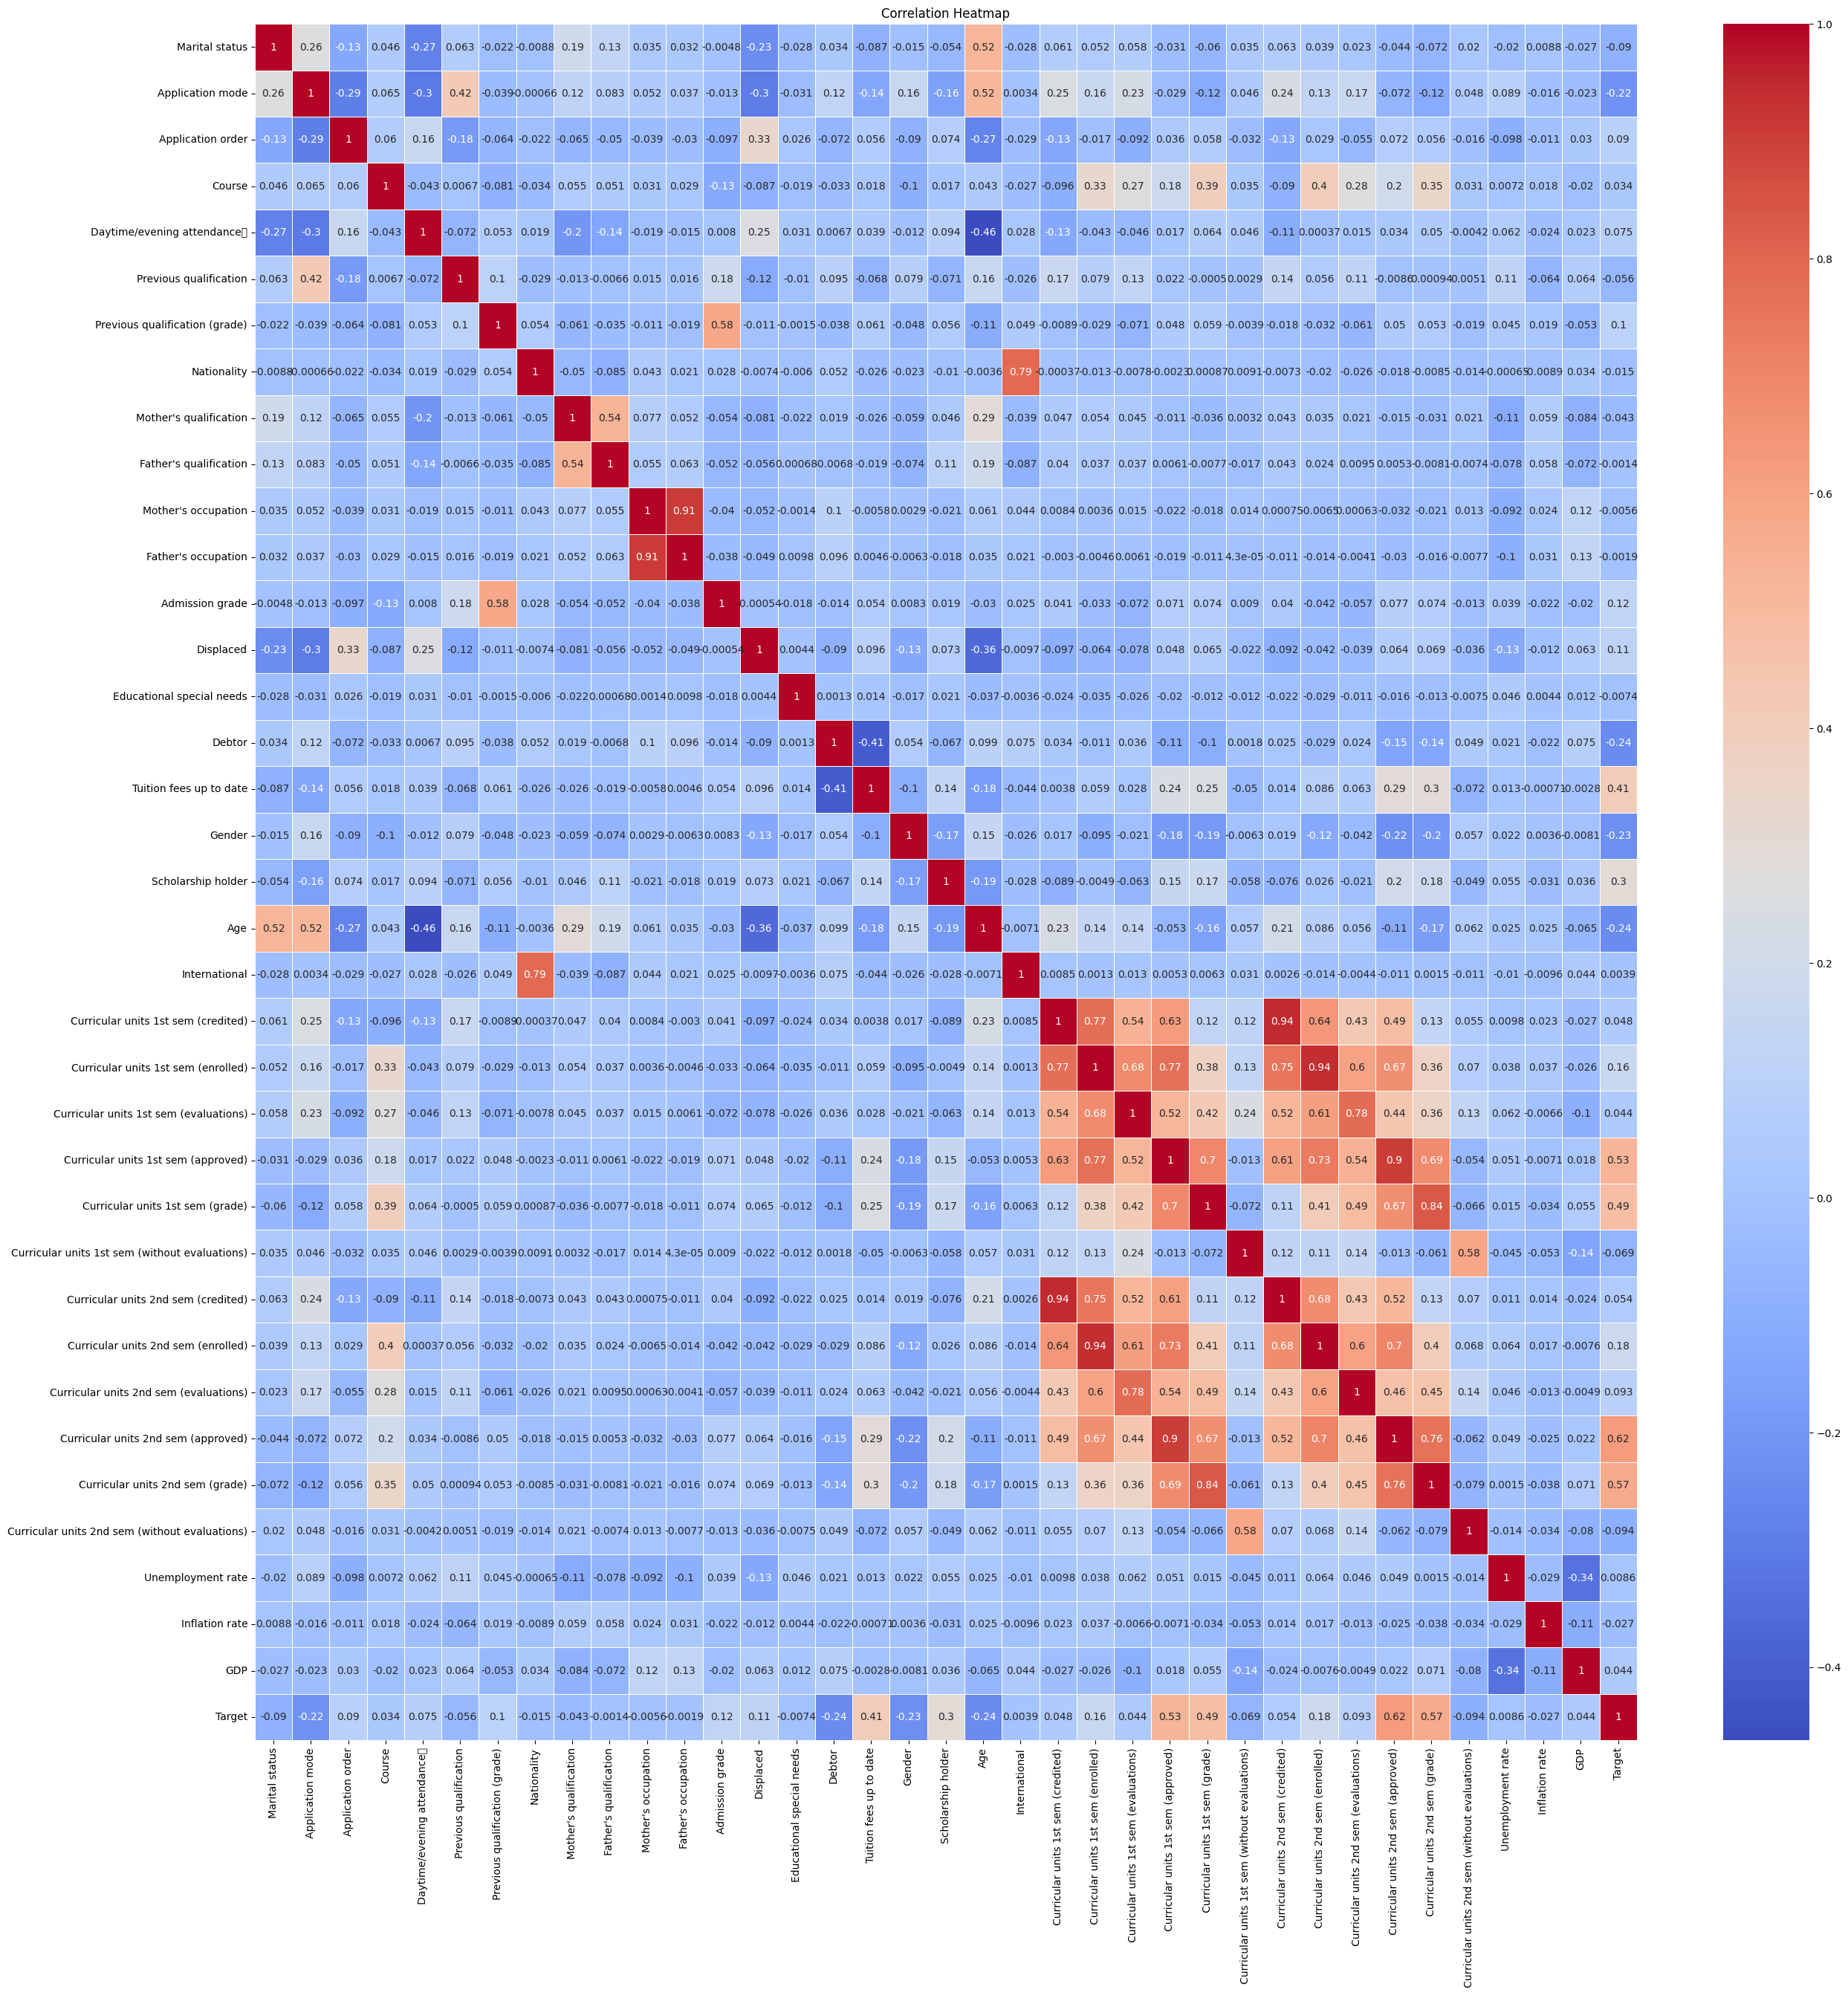

In [26]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Let's visualize the top 10 features mostly related to the Target feature

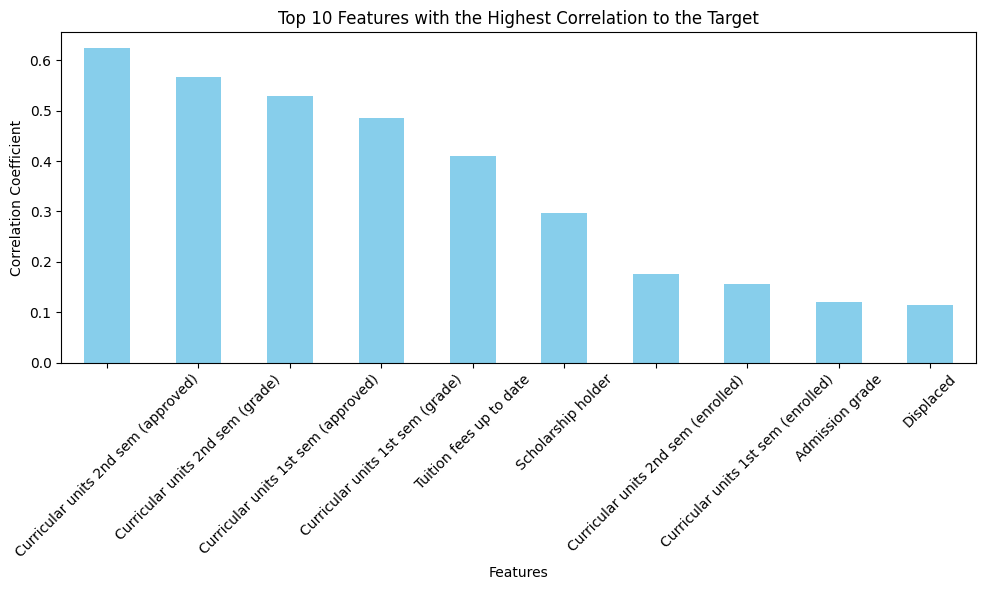

In [39]:
# Calculate the correlation of all features with the 'Target' feature
correlation = data.corr()['Target'].sort_values(ascending=False)

# Exclude the 'Target' itself and select the top 10 features
top_features = correlation[1:11]

# Create a bar plot for the top 10 features with the highest correlation to the 'Target'
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar', color='skyblue')
plt.title('Top 10 Features with the Highest Correlation to the Target')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let us also visualize the outcomes by grouping the data in different categories that are relevant and highly correlated to the target.

In [40]:
# Grouping student outcomes by different categories and calculating the count of each target value within these groups

# Group by course
grouped_by_course = data.groupby('Course')['Target'].value_counts(normalize=True).unstack().fillna(0)

# Group by gender
grouped_by_gender = data.groupby('Gender')['Target'].value_counts(normalize=True).unstack().fillna(0)

# Group by displaced status
grouped_by_displaced = data.groupby('Displaced')['Target'].value_counts(normalize=True).unstack().fillna(0)

# Group by tuition fees status
grouped_by_tuition = data.groupby('Tuition fees up to date')['Target'].value_counts(normalize=True).unstack().fillna(0)

# Group by scholarship holder status
grouped_by_scholarship = data.groupby('Scholarship holder')['Target'].value_counts(normalize=True).unstack().fillna(0)

# Group by daytime/evening attendance
grouped_by_attendance = data.groupby('Daytime/evening attendance\t')['Target'].value_counts(normalize=True).unstack().fillna(0)

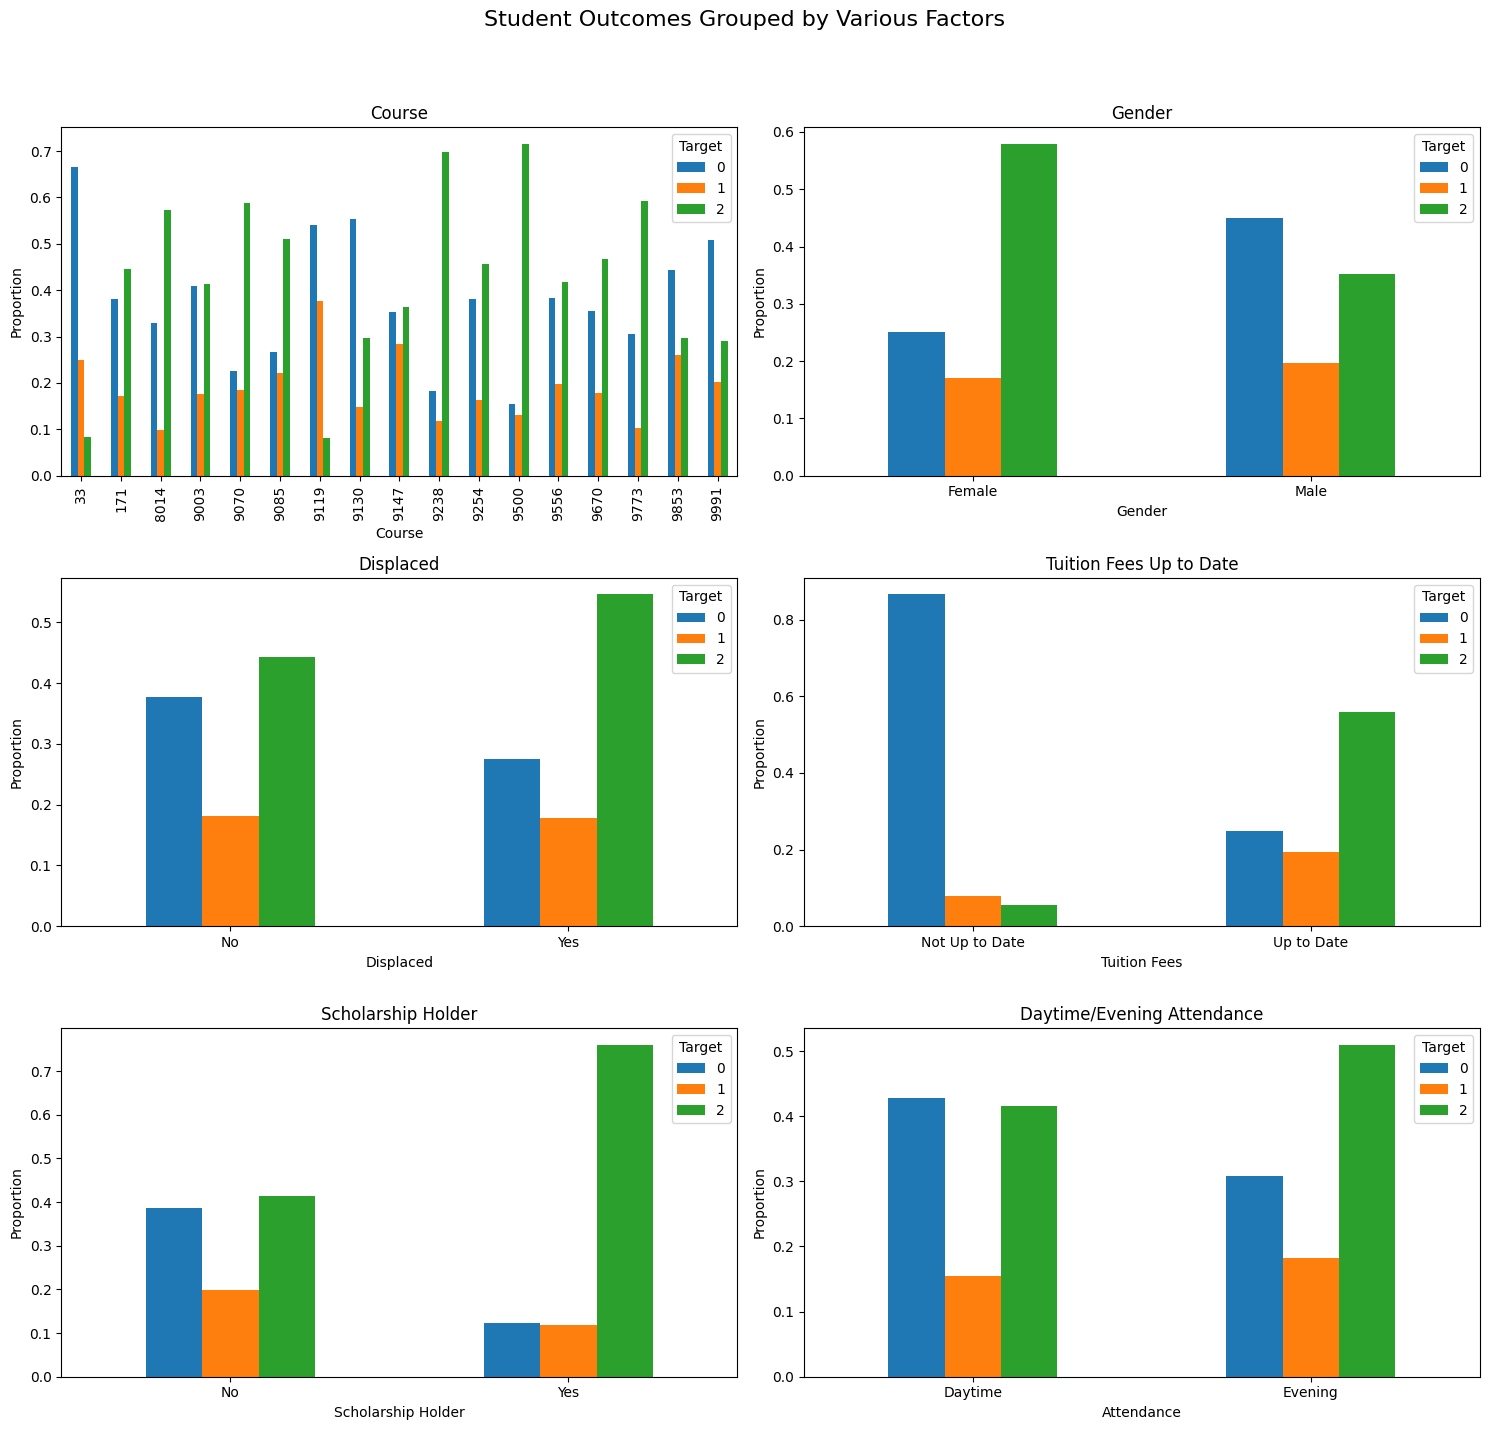

In [42]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Title for the entire figure
fig.suptitle('Student Outcomes Grouped by Various Factors', fontsize=16)

# Course
grouped_by_course.plot(kind='bar', ax=axes[0, 0], title='Course')
axes[0, 0].set_ylabel('Proportion')
axes[0, 0].set_xlabel('Course')

# Gender
grouped_by_gender.plot(kind='bar', ax=axes[0, 1], title='Gender')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_xticklabels(['Female', 'Male'], rotation=0)

# Displaced
grouped_by_displaced.plot(kind='bar', ax=axes[1, 0], title='Displaced')
axes[1, 0].set_ylabel('Proportion')
axes[1, 0].set_xlabel('Displaced')
axes[1, 0].set_xticklabels(['No', 'Yes'], rotation=0)

# Tuition fees
grouped_by_tuition.plot(kind='bar', ax=axes[1, 1], title='Tuition Fees Up to Date')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].set_xlabel('Tuition Fees')
axes[1, 1].set_xticklabels(['Not Up to Date', 'Up to Date'], rotation=0)

# Scholarship holder
grouped_by_scholarship.plot(kind='bar', ax=axes[2, 0], title='Scholarship Holder')
axes[2, 0].set_ylabel('Proportion')
axes[2, 0].set_xlabel('Scholarship Holder')
axes[2, 0].set_xticklabels(['No', 'Yes'], rotation=0)

# Daytime/evening attendance
grouped_by_attendance.plot(kind='bar', ax=axes[2, 1], title='Daytime/Evening Attendance' )
axes[2, 1].set_ylabel('Proportion')
axes[2, 1].set_xlabel('Attendance')
axes[2, 1].set_xticklabels(['Daytime', 'Evening'], rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The analysis of student outcomes, grouped by various factors, provides insights into the distribution of dropout, enrollment, and graduation rates:

- By **Course**: Each course has a distinct distribution of outcomes, with some courses having higher graduation rates and others higher dropout rates.
- By **Gender**: There's a noticeable difference between genders, with males having a higher dropout rate, while females have a higher graduation rate.
- By **Displacement Status**: Displaced students tend to graduate at a higher rate than those who are not displaced.
- By **Tuition Fees Status**: Students with up-to-date tuition fees have a higher graduation rate compared to those who are not up-to-date.
- By **Scholarship Status**: Scholarship holders show a significantly higher graduation rate than non-scholarship holders.
- By **Daytime/Evening Attendance**: Evening attendees have a higher graduation rate compared to daytime attendees.

## Step 4 - Dataset variations
For our project, we would like to answer a very famous question: *Which is better: Quantity or Quality?*

For this reason, we created 3 variations of the same dataset:
- The first dataset `processed_data.csv` is the original, "untouched" dataset
- The second dataset `top_features.csv` takes in consideration and extracts only the top 10 features correlated to the target
- The third dataset `data_without_worst_features.csv` is the opposite: It takes in consideration the whole dataset except the 10 least correlated features.

All the models that will be later used to fit this data is going to be trained and tested on the 3 datasets. This will allow us to draw some conclusion regarding the quantity/quality question.

In [31]:
# Extract the names of the top 10 features correlated to 'Target' (excluding 'Target' itself)
top_features_names = top_features.index.tolist()

# Create a new dataframe with only the top 10 features and the 'Target'
data_with_top_features = data[top_features_names + ['Target']]

data_with_top_features.head()
data_with_top_features.to_csv('top_features.csv', index=False)

In [32]:
# Determine the 10 features with the lowest correlation to 'Target'
worst_features_names = correlation.tail(10).index.tolist()

# Print the names of the worst 10 correlated features
worst_features_names

# Create a new dataframe excluding these 10 features
data_without_worst_features = data.drop(worst_features_names, axis=1)

data_without_worst_features.head()
data_without_worst_features.to_csv('data_without_worst_features.csv', index=False)


## Step 5 - Feature Engineering
After a deeper understanding of the dataset and its features, we decided to create composite features that might be relevant for the analysis, like student's overall success rate based on the number of units passed versus enrolled. 

We will create a couple of new features:

- **Success Rate in 1st Semester**: The ratio of approved curricular units to enrolled units in the 1st semester.
- **Success Rate in 2nd Semester**: The ratio of approved curricular units to enrolled units in the 2nd semester.


These features could provide insights into the performance and progression of students throughout their academic journey.

In [43]:
# Create a copy of the data for enhanced analysis
enhanced_data = data.copy()

# Apply feature engineering to the enhanced data
enhanced_data['Success Rate 1st Sem'] = enhanced_data['Curricular units 1st sem (approved)'] / enhanced_data['Curricular units 1st sem (enrolled)']
enhanced_data['Success Rate 1st Sem'] = enhanced_data['Success Rate 1st Sem'].replace(np.inf, 0).fillna(0)  # Replace infinite and NaN values with 0

enhanced_data['Success Rate 2nd Sem'] = enhanced_data['Curricular units 2nd sem (approved)'] / enhanced_data['Curricular units 2nd sem (enrolled)']
enhanced_data['Success Rate 2nd Sem'] = enhanced_data['Success Rate 2nd Sem'].replace(np.inf, 0).fillna(0)  # Replace infinite and NaN values with 0

Let's look at the relationship between Success Rates and Target:

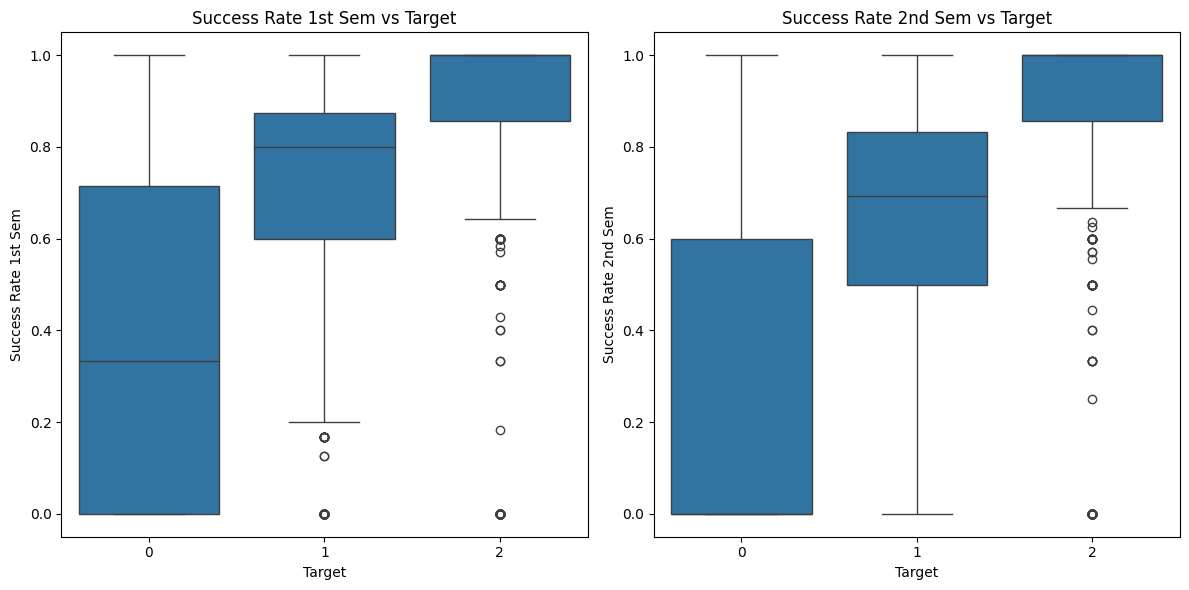

In [45]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Target', y='Success Rate 1st Sem', data=enhanced_data)
plt.title('Success Rate 1st Sem vs Target')

plt.subplot(1, 2, 2)
sns.boxplot(x='Target', y='Success Rate 2nd Sem', data=enhanced_data)
plt.title('Success Rate 2nd Sem vs Target')
plt.tight_layout()
plt.show()

The bivariate analysis shows box plots comparing the target variable with the success rates in the first and second semesters.

- In the Success Rate 1st Sem vs Target plot, we can observe how the success rate in the first semester varies across the different target outcomes (Dropout, Enrolled, Graduate).
- Similarly, the Success Rate 2nd Sem vs Target plot illustrates the distribution of success rates in the second semester among the same target groups.

Let us continue with a multivariate analysis on some subset of relevant features:

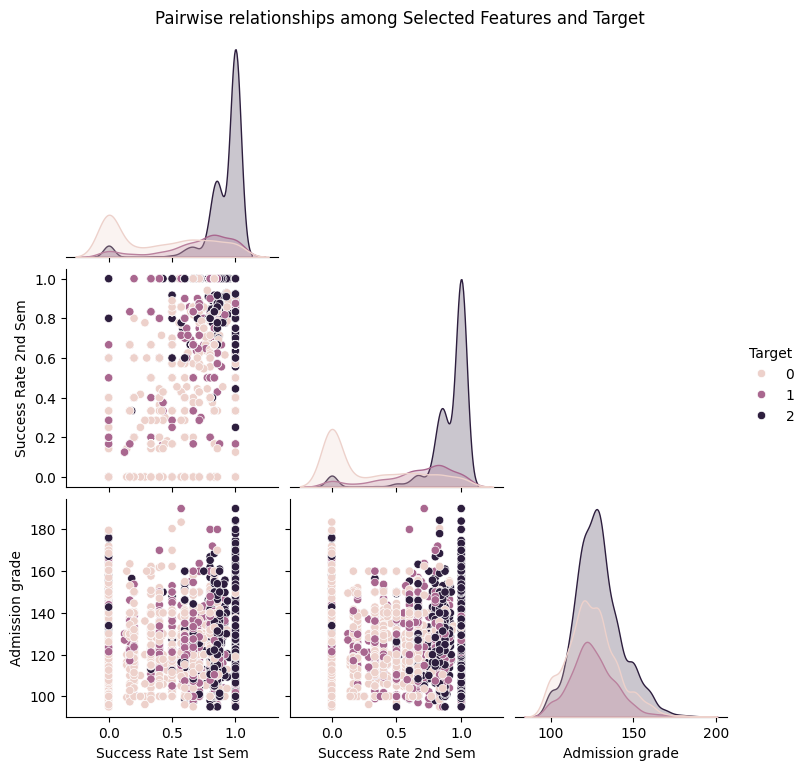

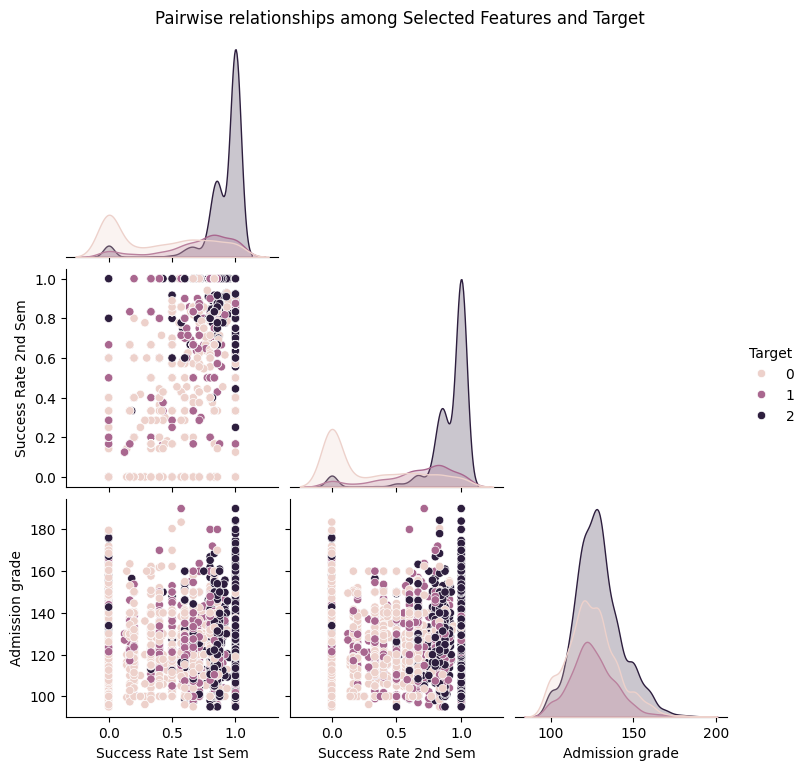

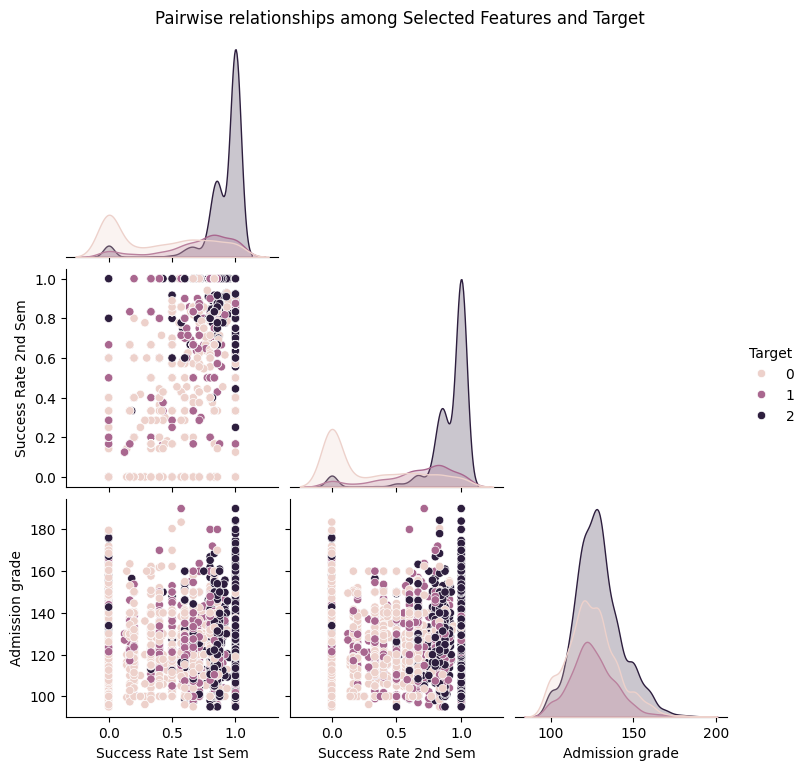

In [ ]:
# For multivariate analysis
subset_features = ['Success Rate 1st Sem', 'Success Rate 2nd Sem', 'Admission grade', 'Target']

# Using seaborn's pairplot to visualize pairwise relationships in the dataset
sns.pairplot(enhanced_data[subset_features], hue='Target', corner=True)
plt.suptitle('Pairwise relationships among Selected Features and Target', y=1.02)
plt.show()

# Remove or impute infinite values and NaNs for the multivariate analysis
enhanced_data_clean = enhanced_data.replace([np.inf, -np.inf], np.nan).dropna()

# Proceed with the multivariate analysis using the cleaned data
sns.pairplot(enhanced_data_clean[subset_features], hue='Target', corner=True)
plt.suptitle('Pairwise relationships among Selected Features and Target', y=1.02)
plt.show()


### Anomaly Detection
We conducted anomaly detection on some key features, uncovering outliers that significantly deviated from the norm. These outliers could represent exceptional cases or potential inaccuracies in the data, warranting further investigation.

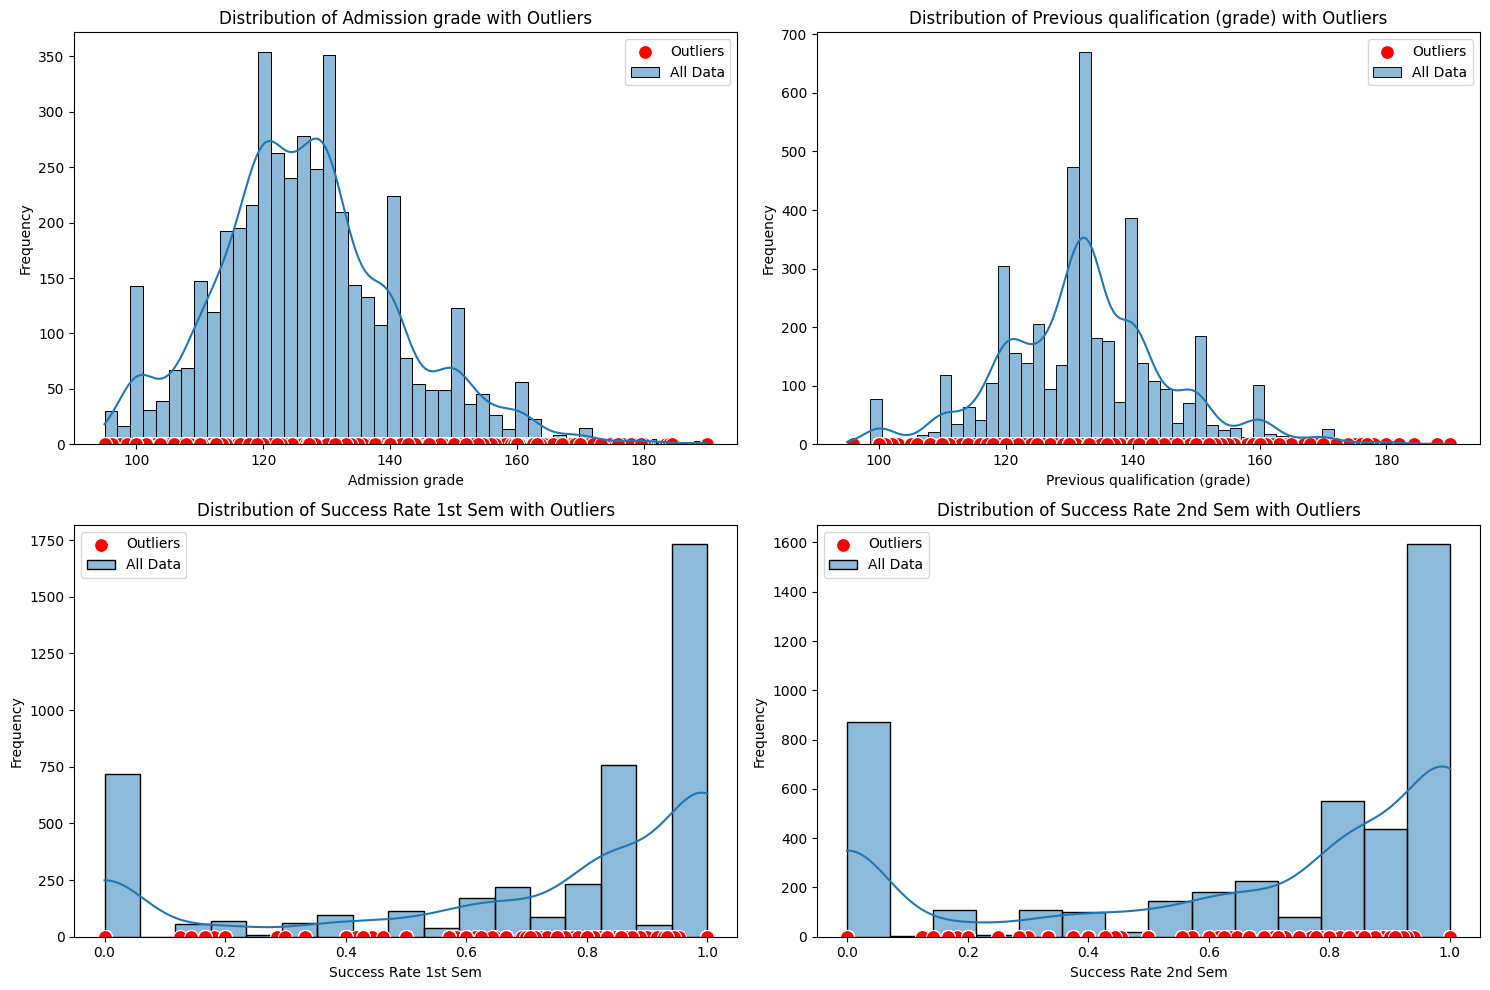

In [47]:
# Identify numerical columns in the dataset to perform anomaly detection
numerical_columns = enhanced_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('Target')  # Exclude the Target column

# Calculate the Z-score for each numerical column
z_scores = enhanced_data[numerical_columns].apply(zscore)

# Define a threshold to identify outliers
threshold = 3

# Find outliers in the dataset
outliers_all = (np.abs(z_scores) > threshold).any(axis=1)
outliers_data = enhanced_data[outliers_all]

# Number of outliers found
outliers_count = outliers_data.shape[0]

# Visualizing outliers for a selection of key numerical features

# Select a few key numerical columns for visualization
key_numerical_columns = ['Admission grade', 'Previous qualification (grade)', 'Success Rate 1st Sem', 'Success Rate 2nd Sem']

# Visualizing outliers for a selection of key numerical features with corrected function call
plt.figure(figsize=(15, 10))

for index, column in enumerate(key_numerical_columns, 1):
    plt.subplot(2, 2, index)
    sns.histplot(enhanced_data[column], kde=True, label='All Data')
    sns.scatterplot(x=outliers_data[column], y=[0] * len(outliers_data), color='red', label='Outliers', s=100)
    plt.title(f'Distribution of {column} with Outliers')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

### Summary of Findings

# II. Superivsed Model Training
This step is implemented in our Repository. 